In [2]:

import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Prepare data
## 1.1 Get your X and y in the right shape

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# diabetes #dictionary of numpy arrays - bunch

print("Features: ", diabetes.feature_names)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:

# features
X = diabetes.data
print(X.shape) #(442 = number of samples, 10 = features)(m, n)
X

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [5]:
# target
y = diabetes.target

print(y.shape) #small letter y represents vector
print("values",y[0:3])
print(y[0])

(442,)
values [151.  75. 141.]
151.0


In [6]:
# 1.2 Split Train test split your data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
y_test.shape

(89,)

In [8]:
# Feature scale your data to reach faster convergence
print(X_train[0])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

[ 0.05987114 -0.04464164 -0.00081689 -0.08485599  0.0754844   0.07947843
  0.00446045  0.03430886  0.02337142  0.02791705]


In [9]:

X_train[0]

array([ 1.26920372, -0.94754919, -0.07219371, -1.81252141,  1.60800981,
        1.67997211,  0.11119717,  0.70895117,  0.47692205,  0.55382707])

In [10]:
intercept = np.ones((X_train.shape[0], 1)) # add 1 
X_train = np.concatenate((intercept, X_train), axis = 1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)
X_test[0]

array([ 1.        ,  1.04018911,  1.05535418,  1.76711361,  1.8624975 ,
        0.76141464,  0.45869274, -0.50513417,  0.70895117,  1.38950635,
        2.74161752])

In [11]:
# 1.5. Feature Engineering (optional)

# It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target. Here we gonna skip


from time import time

theta = np.zeros(X_train.shape[1])

lr = 0.001 #alpha

max_iter = 50

#three steps to gradient descent

start = time()

for i in range(max_iter):
    #1. prediction
    # X @ w
    print(f"step{i}")
    y_hat = X_train @ theta

    #2. calculate gradient
    # grad = X^T (h - y)
    grad = X_train.T @ (y_hat - y_train)

    #3. update the theta
    # w = w - lr * grad
    theta = theta - lr * grad
    print(theta)

time_taken = time() - start

print("Time taken: ", time_taken)
print("Theta: ", theta)

step0
[ 54.442        4.042267     0.16654737  16.00229228  10.94004604
   4.75843622   3.65118723 -11.30648537  11.55611522  15.59225042
   9.98615106]
step1
[89.665974    0.45318045 -5.87407867 17.00926051  9.47160316 -1.59068061
 -3.71070628 -9.33273795  5.9072451  14.12528849  6.18167534]
step2
[112.45588518   0.53492685  -7.74679141  21.13491353  11.67198265
  -1.21909991  -3.97998653 -11.21863193   7.37717498  17.89573245
   7.3319011 ]
step3
[127.20095771  -0.39210908  -9.94512911  22.3208851   11.74480218
  -2.39410217  -5.61834216 -10.96754858   6.24136335  18.63148339
   6.33418897]
step4
[136.74101964  -0.62048578 -11.05712359  23.61910823  12.28066895
  -2.42531621  -5.94099346 -11.29988388   6.27284635  19.93724084
   6.14998318]
step5
[142.91343971  -0.92388058 -11.93142883  24.21836124  12.41562116
  -2.65471002  -6.35439529 -11.29236327   5.92999407  20.59467916
   5.677881  ]
step6
[146.90699549  -1.06318377 -12.44561362  24.68261295  12.58014474
  -2.68519603  -6.4858

In [13]:


diabetes.feature_names

#if the magnitude is higher, it means that feature is important (ignore the negative)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [14]:
## 2.2 Compute accuracy/loss

#for regression, mean squared error
#for classification, accuracy, recall, precision


def mse(yhat, y):
   return  ((yhat - y)**2).sum() / yhat.shape[0]


#training mse
yhat_train = X_train @ theta

mse_train = mse(yhat_train, y_train)

print("MSE train: ", mse_train)

#testing mse

yhat_test = X_test @ theta

mse_test = mse(yhat_test, y_test)

print("MSE test: ", mse_test)

MSE train:  2982.1565448209076
MSE test:  2546.348099590069


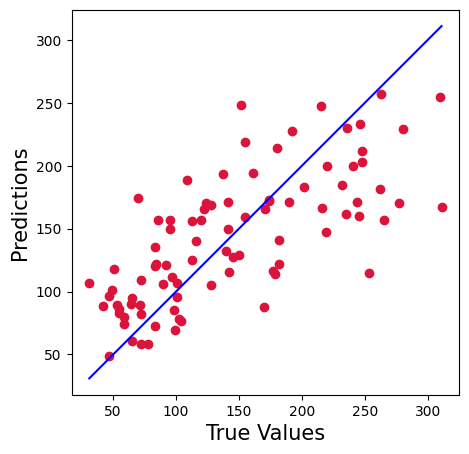

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, yhat_test, c='crimson')

p1 = max(max(yhat_test), max(y_test))
p2 = min(min(yhat_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()